## A look at the different images sizes within the newly scraped test set.

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
from pathlib import Path
import imagesize
from PIL import Image
%matplotlib inline

In [2]:
# This code for this cell and the next came from: https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
# accessed 2023_09_02

root = 'data/processed/new_test_images/'
dirs = [d for d in Path(root).iterdir() if d.is_dir()]

# Geting the image resolutions
img_meta = {}
for dir in dirs:
    imgs = [img.name for img in Path(dir).iterdir() if img.suffix == ".jpg"]
    for f in imgs: img_meta[str(dir) + '/' + str(f)] = imagesize.get(dir/f)


In [3]:
# Converting it to dataframe and computing aspect ratio
img_meta_test = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_test[['Width', 'Height']] = pd.DataFrame(img_meta_test['Size'].tolist(), index=img_meta_test.index)
img_meta_test['Aspect Ratio'] = round(img_meta_test['Width'] / img_meta_test['Height'], 2)

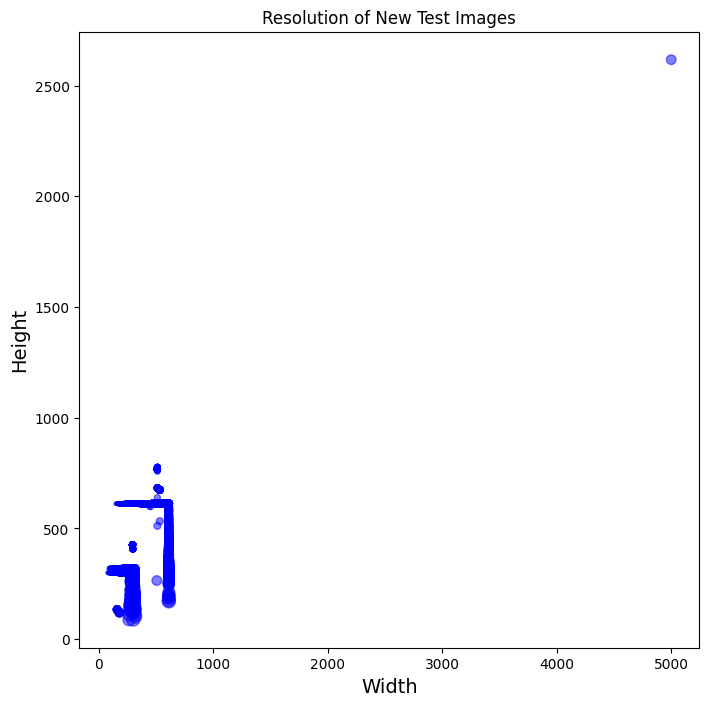

In [4]:
# Plotting width vs. height of images
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_test.Width, img_meta_test.Height, color='blue', alpha=0.5, s=img_meta_test["Aspect Ratio"]*100, picker=True, marker='.')
_ = ax.set_title('Resolution of New Test Images')
_ = ax.set_xlabel('Width', size=14)
_ = ax.set_ylabel('Height', size=14)

In [10]:
img_meta_test.Width.mean(), img_meta_test.Height.mean()

(404.2129617282304, 544.3172422989732)

In [5]:
# Finding largest image
img_meta_test[img_meta_test['Height'] > 1000]

,FileName,Size,Width,Height,Aspect Ratio
3062,data/processed/new_test_images/leggings_and_sa...,"(5000, 2617)",5000,2617,1.91


In [6]:
# Finding path for largest image
img_meta_test.iloc[3062,0]

'data/processed/new_test_images/leggings_and_salwars/399.jpg'

### Largest image in both height and width in the validation set:

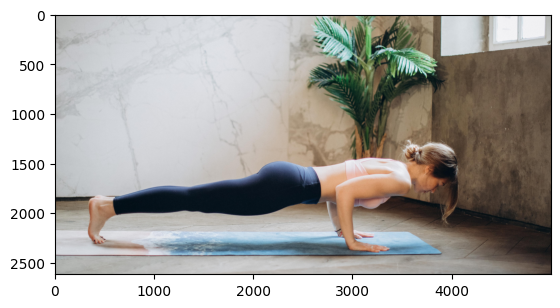

In [7]:
img = Image.open('data/processed/new_test_images/leggings_and_salwars/399.jpg')
_ = plt.imshow(img)

## Removing the largest image will allow comparison of the rest of the images with the images in the dataset from Kaggle

In [8]:
img_meta_test.drop(3062, inplace=True)

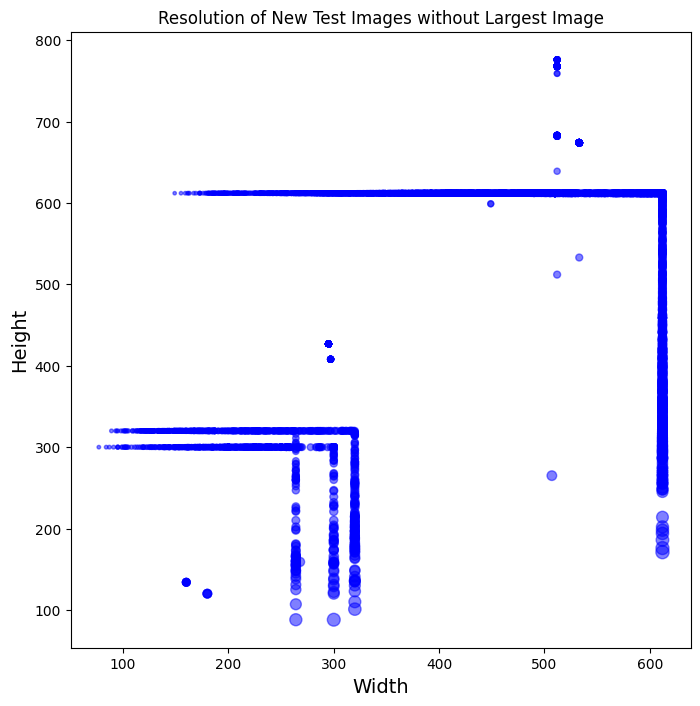

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_test.Width, img_meta_test.Height, color='blue', alpha=0.5, s=img_meta_test["Aspect Ratio"]*100, picker=True, marker='.')
_ = ax.set_title('Resolution of New Test Images without Largest Image')
_ = ax.set_xlabel('Width', size=14)
_ = ax.set_ylabel('Height', size=14)

## Many images are much larger than in the original data